# Wontfix Ticket Analysis

This Jupyter Notebook allows you to recreate the data from our research paper. It is broken into sections containing

## Table of Contents

1. [Data Preperation](#scrollTo=_NFe25emEZbB)
  - [Sample Data](#scrollTo=hgNkXL4rZItV)
1. [RQ1: How Common is the wontfix Label in Open Source Repositories?](#scrollTo=EswCgJ1Wbukf)
2. [RQ2: What similarities exist between issues marked with the wontfix label?](#scrollTo=Jsi8PYfLDNo8)
3. [RQ3: What common reasons are there for an issue getting labeled as wontfix?](#rq3)
4. [RQ4: How does the use of wontfix labels affect project health](#rq4)

## Data Preperation

This section will load the initial data into Pandas for use througought this document.

Once complete, there will be three total dataframes available for use:

1. `issues`: Includes all `wontfix` issues found in qualifying repos. This does not include issues that are _also_ pull-requests
1. `pull_requests`: Includes all `wontfix` pull-requests found in qualifying repos. These have been removed from `issues` so they are not duplicate,
1. `repos`: Includes all github repositories that are not forks, have 10,000 or more stars, and use the `wontfix` label

In [ ]:
import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download (or re-download) the Source Files to Prepare for Importing into Pandas
%cd /content
!rm -rf /content/original_data/
!mkdir -p original_data/
!wget -O original_data/issues.csv https://drive.google.com/uc?id=1r_xpR8EK39TeRbm073iQk5_L_OmUpDIR # https://drive.google.com/file/d/1r_xpR8EK39TeRbm073iQk5_L_OmUpDIR/view?usp=sharing
!wget -O original_data/pulls.csv https://drive.google.com/uc?id=12vgmCyRtDx0f8-d62GpxLkRD4OXtl_GR # https://drive.google.com/file/d/12vgmCyRtDx0f8-d62GpxLkRD4OXtl_GR/view?usp=sharing
!wget -O original_data/repos.csv https://drive.google.com/uc?id=1mMn81ARIdafL_ysNPXo4NlPAjRZ3_wIw # https://drive.google.com/file/d/1mMn81ARIdafL_ysNPXo4NlPAjRZ3_wIw/view?usp=sharing
!wget -O original_data/qualitative.csv https://drive.google.com/uc?id=1jHOm0HFQcRkEnRhbVM3kC99euRpAwhdJ # https://drive.google.com/file/d/1jHOm0HFQcRkEnRhbVM3kC99euRpAwhdJ/view?usp=sharing
!wget -O original_data/new_repos.csv https://drive.google.com/uc?id=1qSyRMpuQse0e2z2u-cQaFDRotklomi_h # https://drive.google.com/file/d/1qSyRMpuQse0e2z2u-cQaFDRotklomi_h/view?usp=sharing


/content
--2024-04-28 22:13:04--  https://drive.google.com/uc?id=1r_xpR8EK39TeRbm073iQk5_L_OmUpDIR
Resolving drive.google.com (drive.google.com)... 64.233.181.101, 64.233.181.139, 64.233.181.102, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1r_xpR8EK39TeRbm073iQk5_L_OmUpDIR [following]
--2024-04-28 22:13:04--  https://drive.usercontent.google.com/download?id=1r_xpR8EK39TeRbm073iQk5_L_OmUpDIR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.201.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77653024 (74M) [application/octet-stream]
Saving to: ‘original_data/issues.csv’

original_data/issue 100%[===================>]  74.06M  76.7MB/s    in 1.0s    

2024-04-28 2

In [ ]:
def convert_string_to_list(string):
    try:
        return ast.literal_eval(string)
    except:
        return []  # Return an empty list if there's an error

%cd /content/original_data/
%ls
issues = pd.read_csv('issues.csv', index_col='id', converters={'labels': convert_string_to_list})
pull_requests = pd.read_csv('pulls.csv', index_col='id', converters={'labels': convert_string_to_list})
issues_and_prs = pd.concat([issues, pull_requests])
repos = pd.read_csv('repos.csv', index_col='id')
qualitative = pd.read_csv('qualitative.csv', index_col='id')

/content/original_data
issues.csv  new_repos.csv  pulls.csv  qualitative.csv  repos.csv


In [ ]:
pair_old_repos = pd.read_csv('repos.csv')
pair_new_repos = pd.read_csv('new_repos.csv')

all_repos = pd.concat([pair_old_repos, pair_new_repos]).drop_duplicates(subset=['id'], keep='first')

In [ ]:
pull_requests.shape

(4643, 13)

### Sample Data

This demonstrates the setup of each csv file for reference in future work against these datasets.

In [ ]:
issues.head(10)

,title,number,repoId,repoName,labels,state,comments,createdAt,updatedAt,closedAt,body,user,userId
id,,,,,,,,,,,,,
1791145832,[FEATURE] add javadoc to fields and props of a...,3453,2049,rzwitserloot/lombok,[wontfix],closed,5,2023-07-06T09:13:53Z,2023-09-03T18:21:18Z,2023-09-03T11:02:24Z,**Describe the feature**\n\nImagine something ...,nimo23,3045549
487841046,"[BUG] Error:(17, 1) java: constructor Comment(...",2225,2049,rzwitserloot/lombok,[wontfix],closed,4,2019-09-01T05:04:20Z,2019-09-10T21:56:01Z,2019-09-10T21:56:01Z,"**Describe the bug**\nError:(17, 1) java: cons...",dannyZhou,6329191
241433203,Can support kotlin?,1436,2049,rzwitserloot/lombok,[wontfix],closed,5,2017-07-08T07:31:03Z,2023-07-04T07:23:54Z,2022-01-23T09:14:14Z,![image](https://user-images.githubusercontent...,z589533,12063612
165960134,[Feature Request] ToString inclusion of super ...,1158,2049,rzwitserloot/lombok,[wontfix],closed,1,2016-07-17T04:41:08Z,2016-07-22T09:15:49Z,2016-07-22T09:15:49Z,http://stackoverflow.com/questions/38417662/ca...,oleersoy,1163873
159084654,java.util.Optional with @Setter,1125,2049,rzwitserloot/lombok,[wontfix],closed,5,2016-06-08T05:51:25Z,2016-06-26T05:09:16Z,2016-06-08T20:17:45Z,```\npublic class Foo {\n @Getter @Setter\n...,foror,95097
152580552,Inconsistent creation of java.beans.Constructo...,1099,2049,rzwitserloot/lombok,[wontfix],closed,1,2016-05-02T15:42:56Z,2016-05-11T21:42:44Z,2016-05-11T21:41:32Z,"I got irritated by the fact, that the addition...",mawis,2042030
151333004,@setter bug,1097,2049,rzwitserloot/lombok,[wontfix],closed,1,2016-04-27T08:57:03Z,2016-05-11T22:13:49Z,2016-05-11T22:13:49Z,"I define three variables in java , like:\n\n``...",lvbolvtian,2943710
118093735,Consider adding Java 7 option for Delombok,975,2049,rzwitserloot/lombok,[wontfix],closed,2,2015-11-20T18:02:58Z,2015-11-22T22:14:12Z,2015-11-22T22:14:12Z,I don't think that Delombok considers the Java...,awhitford,123887
117535359,@NonEmpty,969,2049,rzwitserloot/lombok,[wontfix],closed,1,2015-11-18T08:05:39Z,2015-11-22T22:49:39Z,2015-11-22T22:49:33Z,"Wouldn't it be nice, to have Annotation that e...",punkratz312,8830888


In [ ]:
pull_requests.sample(10)

,title,number,repoId,repoName,labels,state,comments,createdAt,updatedAt,closedAt,body,user,userId
id,,,,,,,,,,,,,
1850360634,Update site.js,568,6713882,mattboldt/typed.js,[Wontfix],closed,1,2023-08-14T18:54:55Z,2023-10-20T23:35:01Z,2023-10-20T23:35:00Z,NaN,RohitPaul0007,113459757
574109262,Hide warning when session is not connector owner,4606,3993777,aio-libs/aiohttp,"[invalid, wontfix]",closed,3,2020-03-02T16:54:52Z,2020-10-16T14:40:09Z,2020-10-16T14:40:08Z,## What do these changes do?\r\n\r\nI am using...,jochemb,7023432
601242143,[WIP] feat: rewrite dva api surface in TypeScript,2321,6694110,dvajs/dva,[wontfix],closed,2,2020-04-16T16:50:27Z,2020-10-17T20:00:48Z,2020-10-17T20:00:48Z,<!--\r\nThank you for your pull request. Pleas...,xc1427,5611770
38565682,Fix _.before() and _.after() used in an OOP style,1763,6889882,jashkenas/underscore,"[wontfix, breaking change]",closed,13,2014-07-23T19:58:35Z,2014-08-27T21:34:46Z,2014-08-27T20:25:16Z,When using the `_.before()` and `_.after()` wi...,jondavidjohn,401520
75561420,Remove ACTION_OPEN_DOCUMENT from AttachmentMan...,3154,88718,signalapp/signal-android,[wontfix],closed,43,2015-05-12T10:56:58Z,2022-02-01T23:32:07Z,2022-02-01T23:32:07Z,Fixes #1744\n,unrulygnu,11031903
487191641,[WIP] Refactor Tokenizers creation to support ...,1153,3992594,huggingface/transformers,[wontfix],closed,4,2019-08-29T21:49:11Z,2019-12-06T19:12:57Z,2019-12-06T19:12:57Z,As pointed out in #916 currently tokenizers as...,mfuntowicz,2241520
588997,Make Backbone.View.delegateEvents lookup the m...,225,5427261,jashkenas/backbone,"[wontfix, change]",closed,2,2011-02-10T12:39:54Z,2014-07-05T16:30:29Z,2011-05-27T15:56:36Z,This commit allows modification of a view's ca...,timruffles,249800
645007071,Add SignificantDeclarationWhitespaceRule,3249,3753339,realm/swiftlint,[wontfix],closed,3,2020-06-24T22:03:21Z,2020-11-15T02:22:04Z,2020-11-15T02:22:04Z,NaN,igor-makarov,16595309
890769244,Update README.md,11296,88718,signalapp/signal-android,[wontfix],closed,2,2021-05-13T06:41:30Z,2022-02-01T23:32:05Z,2022-02-01T23:32:05Z,<!-- You can remove this first section if you ...,Saiprasad16,35297720


In [ ]:
repos.sample(10)

,name,isFork,commits,branches,releases,forks,mainLanguage,defaultBranch,license,homepage,...,isDisabled,isLocked,languages,labels,topics,wontfixType,updatedIssuesTotal,updatedPullsTotal,wontfixIssues,wontfixPulls
id,,,,,,,,,,,,,,,,,,,,,
52008698,hpcaitech/colossalai,False,3030,22,36,4148,Python,main,Apache License 2.0,https://www.colossalai.org,...,False,False,"{""Python"":7693794,""HTML"":203142,""C++"":127643,""...",api;auto-parallel;bug;chatgpt;code reviewing;c...,ai;big-model;data-parallelism;deep-learning;di...,wontfix,1537,3725,0,0
6574423,goldbergyoni/javascript-testing-best-practices,False,1013,50,0,2047,JavaScript,master,MIT License,https://testjavascript.com/,...,False,False,"{""JavaScript"":164}",bug;documentation;duplicate;enhancement;good f...,angular;chai;ci;cicd;contract-testing;e2e;e2e-...,wontfix,64,193,0,0
69671091,zinclabs/zinc,False,473,47,26,564,Go,main,Other,https://zincsearch.com,...,False,False,"{""Go"":2474915,""Vue"":119779,""TypeScript"":36730,...",bug;dependencies;documentation;duplicate;enhan...,NaN,wontfix,284,621,0,0
3960107,microsoft/unilm,False,1134,31,3,2317,Python,master,MIT License,https://aka.ms/GeneralAI,...,False,False,"{""Python"":32905239,""Jupyter Notebook"":7986547,...",bug;dependencies;documentation;duplicate;enhan...,beit;beit-3;deepnet;document-ai;foundation-mod...,wontfix,1258,227,0,0
6848319,ramda/ramda,False,3006,2,28,1429,JavaScript,master,MIT License,https://ramdajs.com,...,False,False,"{""JavaScript"":743415,""Shell"":739,""Makefile"":45...",1.0 discussion;bug;build;cookbook;coverage;doc...,javascript;ramda,wontfix,1623,1761,17,0
55568801,harness/drone,False,4083,13,29,2638,Go,master,Other,https://drone.io,...,False,False,"{""Go"":1694515,""Shell"":243}",bug;cannot-reproduce;critical;duplicate;enhanc...,build-automation;build-pipelines;ci;ci-cd;cont...,wontfix,1909,1476,10,0
1475333,apache/hadoop,False,27196,339,0,8674,Java,trunk,Apache License 2.0,https://hadoop.apache.org/,...,False,False,"{""Java"":103427045,""C++"":3198520,""C"":2018678,""J...",abfs;aws;backport;bug;build;common;dependencie...,hadoop,wontfix,0,6650,0,0
4072689,javascript-obfuscator/javascript-obfuscator,False,2390,230,217,1406,TypeScript,master,BSD 2-Clause Simplified License,https://obfuscator.io,...,False,False,"{""TypeScript"":2621707,""JavaScript"":121363,""She...",3rd party library;as designed;bug;dependencies...,browser;control-flow;cryptography;encoding;fla...,wontfix,806,389,37,0
3927560,google/yapf,False,1345,3,0,886,Python,main,Apache License 2.0,NaN,...,False,False,"{""Python"":801920,""Vim Script"":2859,""Shell"":2784}",bug;cla: no;cla: yes;duplicate;enhancement;inv...,formatter;google;python,wontfix,837,368,0,0


In [ ]:
repos.columns

Index(['name', 'isFork', 'commits', 'branches', 'releases', 'forks',
       'mainLanguage', 'defaultBranch', 'license', 'homepage', 'watchers',
       'stargazers', 'contributors', 'size', 'createdAt', 'pushedAt',
       'updatedAt', 'totalIssues', 'openIssues', 'totalPullRequests',
       'openPullRequests', 'blankLines', 'codeLines', 'commentLines',
       'metrics', 'lastCommit', 'lastCommitSHA', 'hasWiki', 'isArchived',
       'isDisabled', 'isLocked', 'languages', 'labels', 'topics',
       'wontfixType', 'updatedIssuesTotal', 'updatedPullsTotal',
       'wontfixIssues', 'wontfixPulls'],
      dtype='object')

In [ ]:
all_repos['lastCommit'] = pd.to_datetime(all_repos['lastCommit'])
commit_recently = all_repos['lastCommit'] > '2021-01-01'
recent_repos = all_repos[commit_recently]
len(recent_repos)

2919

In [ ]:
repos['lastCommit'] = pd.to_datetime(repos['lastCommit'])
commit_recently = repos['lastCommit'] > '2021-01-01'
recent_repos = repos[commit_recently]
len(recent_repos)

1652

In [ ]:
issues_and_prs.sample(10)

,title,number,repoId,repoName,labels,state,comments,createdAt,updatedAt,closedAt,body,user,userId
id,,,,,,,,,,,,,
199276776,dunn post-hoc test missing [new feature request],6935,3997018,scipy/scipy,"['scipy.stats', 'wontfix']",closed,7,2017-01-06T20:07:12Z,2017-01-06T21:30:04Z,2017-01-06T21:29:55Z,"Hi,\nThank you for your awesome work which I r...",ybayle,17142748
270991613,Is it possible to include 3DoF or 6DoF info fo...,299,3990802,cmu-perceptual-computing-lab/openpose,"['enhancement', 'wontfix']",closed,3,2017-11-03T14:12:24Z,2019-04-14T00:53:32Z,2019-04-14T00:53:26Z,This is a request for additional functionality...,rojas70,3905488
493844959,Regarding Signal Private Messenger App problem...,9035,88718,signalapp/signal-android,['wontfix'],closed,2,2019-09-16T04:49:06Z,2022-02-04T11:03:29Z,2022-02-04T11:03:29Z,### Bug description\nWhen we switch front<->re...,jongyunchoi742,54938340
488984705,isCustomViewBottom is not working,1379,4073584,faridsafi/react-native-gifted-chat,['wontfix'],closed,1,2019-09-04T07:15:41Z,2019-11-10T08:05:28Z,2019-11-10T08:05:28Z,isCustomViewBottom is not working but readme f...,yasinugrl,19948619
120596827,Use html doctype for html5 and use charset dec...,429,7564420,jitsi/jitsi-meet,['wontfix'],closed,4,2015-12-05T23:58:16Z,2018-12-10T18:37:22Z,2018-12-10T18:37:22Z,Minor cleanup that 1) declares html5 boilerpla...,bickelj,8806433
501292317,instapy 0.6.4 error,5114,55775087,instapy/instapy,['wontfix'],closed,1,2019-10-02T05:56:19Z,2019-11-08T07:15:43Z,2019-11-08T07:15:43Z,<!-- Did you know that we have a Discord chann...,roncam82,46320963
297192287,Support for Nord Color Scheme,235,7554597,carbon-app/carbon,['wontfix'],closed,3,2018-02-14T18:05:16Z,2018-04-01T01:29:59Z,2018-04-01T01:29:59Z,Is there any interest in adding support for th...,TimoStaudinger,5621996
1923767378,pyenv install fails on OS X 14.0 (Sonoma) for ...,2809,52508737,pyenv/pyenv,"['duplicate', 'wontfix']",closed,1,2023-10-03T09:59:35Z,2023-10-03T10:53:56Z,2023-10-03T10:53:42Z,I tried installing both 3.12 and 3.7.14 (on th...,eikopf,60985094
266907108,cmder.net gives certificate error with https,1519,3943247,cmderdev/cmder,"['🎨 Type: Enhancement', 'wontfix']",closed,4,2017-10-19T16:29:58Z,2018-01-16T21:13:09Z,2018-01-16T21:13:09Z,Expected: defaults to https.\n\nActual: https:...,JoshuaKGoldberg,3335181


In [ ]:
qualitative.sample(10)

,title,number,repoId,repoName,labels,state,comments,createdAt,updatedAt,closedAt,...,classifiedBy,url,reason,code,Comments,Toxic?,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
id,,,,,,,,,,,,,,,,,,,,,
390421274,The collectd cant bind to 0.0.0.0,10570,19508851,influxdata/influxdb,"['1.x', 'wontfix']",closed,4,2018-11-08T17:38:31Z,2019-07-31T20:29:52Z,2019-07-31T20:29:52Z,...,sharadha,https://github.com/influxdata/influxdb/issues/...,Technically infeasible,Unsupported,NaN,NaN,NaN,NaN,NaN,NaN
1247421764,Amend git commit message - hangs on git commit...,1151,7537868,typicode/husky,['wontfix'],closed,2,2022-05-25T03:36:55Z,2022-09-11T03:28:18Z,2022-09-11T03:28:18Z,...,alex,https://github.com/typicode/husky/issues/1151,No discussion,No Discussion,NaN,NaN,NaN,NaN,NaN,NaN
1073107324,Add file type,814,4070851,colinhacks/zod,['wontfix'],closed,14,2021-12-07T09:16:44Z,2022-05-20T15:29:48Z,2022-05-20T15:29:48Z,...,alex,https://github.com/colinhacks/zod/issues/814,Requires fix within a dependency,External Project,MR was submitted it just was out of project scope,NaN,NaN,NaN,NaN,NaN
361191901,Permission denied on android device with front...,3458,7564420,jitsi/jitsi-meet,"['mobile', 'wontfix']",closed,8,2018-09-18T08:30:53Z,2019-01-13T10:20:33Z,2019-01-13T10:20:33Z,...,alex,https://github.com/jitsi/jitsi-meet/issues/3458,User environment cause,User-Specific,NaN,NaN,NaN,NaN,NaN,NaN
914028537,Ceph: Dependencies: 6: Ceph[Filesystem/RBD]Mir...,8070,23405371,rook/rook,"['feature', 'wontfix']",closed,3,2021-06-07T23:07:54Z,2022-12-07T20:02:17Z,2022-12-07T20:02:17Z,...,alex,https://github.com/rook/rook/issues/8070,No replies. No discussion,No Discussion,NaN,NaN,NaN,NaN,NaN,NaN
677659661,Feature Request - add option for custom toolba...,7515,7564420,jitsi/jitsi-meet,"['wontfix', 'web', 'api', 'ui/ux']",closed,1,2020-08-12T12:36:15Z,2020-11-21T14:08:27Z,2020-11-21T14:08:27Z,...,alex,https://github.com/jitsi/jitsi-meet/issues/7515,No replies. No discussion,No Discussion,NaN,NaN,NaN,NaN,NaN,NaN
483661281,emscripten::val::gloal() can't access ES6 classes,9285,3990801,emscripten-core/emscripten,"['embind', 'wontfix']",closed,2,2019-08-21T21:27:24Z,2020-09-20T20:28:27Z,2020-09-20T20:28:26Z,...,alex,https://github.com/emscripten-core/emscripten/...,Maintainers don't want to support this feature,No Interest,NaN,NaN,NaN,NaN,NaN,NaN
863411081,2,5302,16124826,z-song/laravel-admin,['wontfix'],closed,1,2021-04-21T03:21:57Z,2021-07-08T08:57:26Z,2021-07-08T08:57:26Z,...,alex,https://github.com/z-song/laravel-admin/issues...,No replies or discussion,No Discussion,NaN,NaN,NaN,NaN,NaN,NaN
131849238,Retry old failed streams with redundant master...,235,4097404,video-dev/hls.js,"['Enhancement', 'Wontfix']",closed,4,2016-02-06T12:12:17Z,2018-06-23T09:25:55Z,2018-06-23T09:25:55Z,...,alex,https://github.com/video-dev/hls.js/issues/235,Alternate fix already available,Workaround,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_repos.sample(10)

,name,isFork,commits,branches,releases,forks,mainLanguage,defaultBranch,license,homepage,...,metrics,lastCommit,lastCommitSHA,hasWiki,isArchived,isDisabled,isLocked,languages,labels,topics
id,,,,,,,,,,,,,,,,,,,,,
3966872,stevenblack/hosts,False,3781,1,639,2124,Python,master,MIT License,NaN,...,"[{""language"":""Text"",""commentLines"":0,""codeLine...",2024-04-22T04:21:49,6d89ad4c73591ca87c7ea368f9925a7306304978,True,False,False,False,"{""Python"":137436,""Batchfile"":2828,""Nix"":1862,""...",bug;cool;dependencies;discussion;documentation...,ad-blocker;anti-virus;curated-sources;gambling...
94660555,labelmeai/labelme,False,1423,1,67,3234,Python,main,Other,NaN,...,"[{""language"":""XML"",""commentLines"":0,""codeLines...",2024-02-11T04:45:08,12d425b956878132566d243b4d9f6f3af33ec810,False,False,False,False,"{""Python"":217436,""Makefile"":369}",bug;enhancement;feature;fix;help wanted;os: wi...,annotations;classification;computer-vision;dee...
14724296,tmrts/go-patterns,False,72,2,0,2151,Go,master,Apache License 2.0,http://tmrts.com/go-patterns,...,"[{""language"":""YAML"",""commentLines"":0,""codeLine...",2017-07-19T10:41:46,f978e420361704bd7531e2b57905a308a3a012c8,False,False,False,False,"{""Go"":12193}",bug;duplicate;enhancement;help wanted;invalid;...,awesome;design-patterns;design-patterns-for-hu...
928120,redisson/redisson,False,9133,3,146,5260,Java,master,Apache License 2.0,https://redisson.pro,...,"[{""language"":""Text"",""commentLines"":0,""codeLine...",2024-04-22T12:01:06,cdafcf264a6eda8697fcc8e06888e011ad796e4e,True,False,False,False,"{""Java"":15063760}",aws;bug;dependencies;dns;duplicate;enhancement...,cache;distributed;distributed-locks;executor;h...
3990797,microsoft/powertoys,False,7256,77,96,6139,C#,main,MIT License,NaN,...,"[{""language"":""YAML"",""commentLines"":136,""codeLi...",2024-04-19T11:40:22,a89f9f69768ace73de21dbf6020bd7fa2460bf4a,True,False,False,False,"{""C#"":5628100,""C++"":3643881,""G-code"":1531604,""...",a11y1p;a11y3p;a11ye+d;a11yexternal;a11ymas;a11...,color-picker;desktop;fancyzones;keyboard-manag...
30574433,nextcloud/server,False,74007,351,221,3829,PHP,master,GNU Affero General Public License v3.0,https://nextcloud.com,...,"[{""language"":""TOML"",""commentLines"":0,""codeLine...",2024-04-23T12:35:21,9476b0df79aae557b042f26a4e53f0f85352129e,True,False,False,False,"{""PHP"":23820494,""JavaScript"":12486486,""Vue"":11...",0. needs triage;1. to develop;19-feedback;2. d...,cloud;collaboration;decentralized;design;distr...
69491881,wez/wezterm,False,7875,15,64,635,Rust,main,Other,https://wezfurlong.org/wezterm/,...,"[{""language"":""GLSL"",""commentLines"":39,""codeLin...",2024-04-06T01:09:10,cce0706b1f2a9e2d1f02c57f2d1cd367c91df1ae,False,False,False,False,"{""Rust"":14814853,""Python"":78636,""Shell"":60973,...",bug;cant-reproduce;conpty;dependencies;docs;do...,rust;serial;serial-port;terminal;terminal-emul...
3971255,codermjlee/mjrefresh,False,408,3,41,3549,Objective-C,master,MIT License,NaN,...,"[{""language"":""Objective-C"",""commentLines"":637,...",2024-03-26T02:45:19,535d39c86e592d73f8b8e75f9bf1eda62ca4a4ce,True,False,False,False,"{""Objective-C"":125182,""Swift"":729,""Ruby"":674}",bug;detail-need(demo);discussion-讨论;duplicate-...,objective-c;refresh
15628562,chromedp/chromedp,False,680,2,33,764,Go,master,MIT License,NaN,...,"[{""language"":""YAML"",""commentLines"":0,""codeLine...",2024-02-04T11:13:19,ebf842c7bc28db77d0bf4d757f5948d769d0866f,False,False,False,False,"{""Go"":328287,""JavaScript"":3813,""Shell"":546}",bug;duplicate;enhancement;help wanted;invalid;...,chrome;chrome-debugging-protocol;chrome-devtoo...


In [ ]:
repos.shape

(1778, 39)

## RQ1: How Common is the wontfix Label in Open Source Repositories?

This needs to answers the question of how often the wontfix label is used across our sample of repositories.

**Steps:**

1. Calculate total repos in our study (all qualifying repos)
1. Count those with a `wontfix` type label in use at least once
1. Find the percentage of applicable repos that use this label

In [ ]:
total_repos = 3132 # This includes all repos with more than 10,000+ stars and excluding forked repositories

issues_with_unique_repo = issues['repoId'].nunique(dropna=True)
issues_with_unique_repo_pct = issues_with_unique_repo/total_repos

prs_with_unique_repo = pull_requests['repoId'].nunique(dropna=True)
prs_with_unique_repo_pct = prs_with_unique_repo/total_repos

any_issue_with_unique_repo = issues_and_prs['repoId'].nunique(dropna=True)
any_issue_with_unique_repo_pct = any_issue_with_unique_repo/total_repos

# Print Results
print(f"There are a total of {total_repos:,} repos. Of these, {issues_with_unique_repo:,} repos contain at least one wontfix issue")
print(f"This demonstrates a total of {issues_with_unique_repo_pct:.2%}")
print(f"{'='*50}")
print(f"There are a total of {total_repos:,} repos. Of these, {prs_with_unique_repo:,} repos contain at least one wontfix pull request")
print(f"This demonstrates a total of {prs_with_unique_repo_pct:.2%}")
print(f"{'='*50}")
print(f"There are a total of {total_repos:,} repos. Of these, {any_issue_with_unique_repo:,} repos contain at least one wontfix issue OR pull request")
print(f"This demonstrates a total of {any_issue_with_unique_repo_pct:.2%}")

There are a total of 3,132 repos. Of these, 902 repos contain at least one wontfix issue
This demonstrates a total of 28.80%
There are a total of 3,132 repos. Of these, 306 repos contain at least one wontfix pull request
This demonstrates a total of 9.77%
There are a total of 3,132 repos. Of these, 927 repos contain at least one wontfix issue OR pull request
This demonstrates a total of 29.60%


In [ ]:
common_issues = set(issues['repoId']).intersection(pull_requests['repoId'])
both_issues_with_unique_repo = len(common_issues)
both_issues_with_unique_repo_pct = both_issues_with_unique_repo/total_repos

print(f"There are a total of {total_repos:,} repos. Of these, {both_issues_with_unique_repo:,} repos contain BOTH at least one wontfix issue AND a pull request")
print(f"This demonstrates a total of {both_issues_with_unique_repo_pct:.2%}")

There are a total of 3,132 repos. Of these, 281 repos contain BOTH at least one wontfix issue AND a pull request
This demonstrates a total of 8.97%


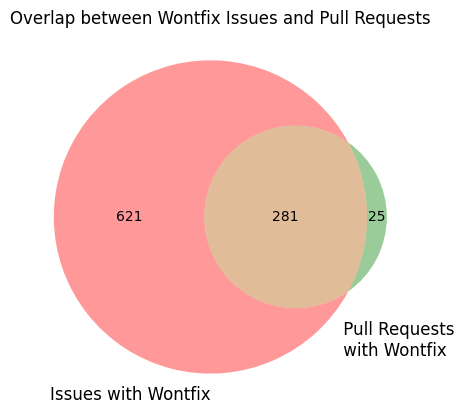

[Text(-0.076631488275893, -0.6005638412138483, 'Issues with Wontfix'), Text(0.2258875896237107, -0.3681839016436309, '         Pull Requests\n         with Wontfix')]


In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Define the sizes of the sets
set_sizes = {'10': 0, '01': 0, '11': 0}  # Initialize all sizes to 0
# Calculate the sizes based on percentages
total_repos = 3132  # Total number of repositories
overlap = both_issues_with_unique_repo
set_sizes['10'] = int(issues_with_unique_repo - overlap)  # Issues with Wontfix
set_sizes['01'] = int(prs_with_unique_repo - overlap)  # Pull Requests with Wontfix
set_sizes['11'] = int(overlap)  # All Issues and Pull Requests with Wontfix
# Create the Venn diagram
venn = venn2(subsets=set_sizes, set_labels=('Issues with Wontfix', '         Pull Requests\n         with Wontfix'))

# Add title and show the plot
plt.title('Overlap between Wontfix Issues and Pull Requests')
plt.show()

print(venn.set_labels)

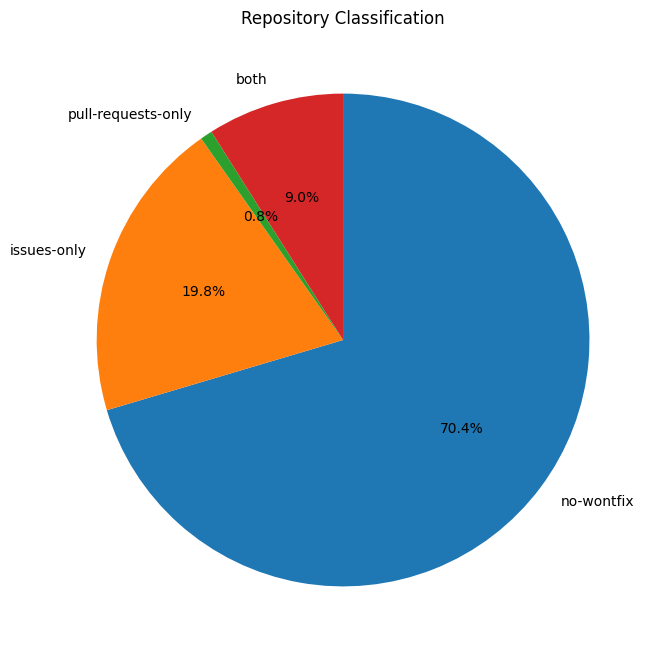

In [ ]:
pie = {
    "no-wontfix": total_repos - (issues_with_unique_repo - overlap) - (prs_with_unique_repo-overlap) - overlap,
    "issues-only": issues_with_unique_repo - overlap,
    "pull-requests-only": prs_with_unique_repo - overlap,
    "both": overlap
}

pie_series = pd.Series(pie)

# Plotting the pie chart from the Pandas Series
plt.figure(figsize=(8, 8))  # Set figure size for better visibility
pie_series.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Repository Classification')  # Add a title to the pie chart
plt.ylabel('')  # Hide the y-label as it's not necessary for pie charts
plt.show()


<ipython-input-12-7c5601a3a2b9>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('crest', 7)


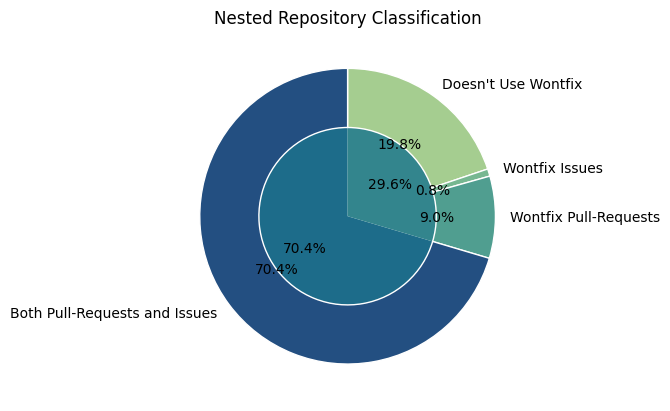

In [ ]:
import matplotlib.pyplot as plt

# Data setup
outer_data = [621, 25, 281, 2205]  # Total counts for each category
outer_labels = ['Doesn\'t Use Wontfix', 'Wontfix Issues', 'Wontfix Pull-Requests', 'Both Pull-Requests and Issues']
inner_data = [2205, sum(outer_data[:-1])]  # 2205 for no-wontfix, sum of others for the remaining
inner_labels = ['', '']  # Percentage labels

# cmap = plt.cm.get_cmap('tab10')
cmap = plt.cm.get_cmap('crest', 7)
# cmap = plt.colormaps['crest']

# Creating the plot
fig, ax = plt.subplots()

# Inner pie chart
ax.pie(inner_data, labels=inner_labels, radius=0.6, autopct='%1.1f%%', colors=[cmap(4),cmap(3)], startangle=90)

# Outer pie chart
ax.pie(outer_data, labels=outer_labels, radius=1.0, autopct='%1.1f%%', colors=[cmap(0), cmap(1), cmap(2), cmap(5)], startangle=90, counterclock=False,
       wedgeprops=dict(width=0.4, edgecolor='w'))

# Add title
plt.title('Nested Repository Classification')

# Show the plot
plt.show()


<ipython-input-13-849ae36be939>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('crest', 7)


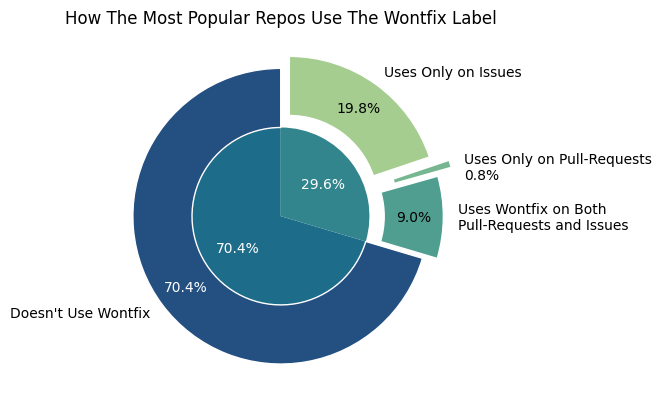

In [ ]:
import matplotlib.pyplot as plt

# Data setup
outer_data = [621, 25, 281, 2205]  # Total counts for each category
outer_labels = ['Uses Only on Issues', 'Uses Only on Pull-Requests', 'Uses Wontfix on Both \nPull-Requests and Issues', 'Doesn\'t Use Wontfix']
inner_data = [2205, sum(outer_data[:-1])]  # 2205 for no-wontfix, sum of others for the remaining
inner_labels = ['', '']  # Percentage labels

# Explode the three smallest values in the outer pie
explode_outer = (0.1, 0.2, 0.1, 0)  # Adjust values to control the explosion distance

cmap = plt.cm.get_cmap('crest', 7)

# Creating the plot
fig, ax = plt.subplots()

# Inner pie chart
inner_pie, inner_pie_labels, inner_pie_autopct = ax.pie(inner_data, labels=inner_labels, radius=0.6, autopct='%1.1f%%', colors=[cmap(4), cmap(3)], startangle=90)

# Outer pie chart
outer_pie, outer_pie_labels, outer_pie_autopcts = ax.pie(outer_data, labels=outer_labels, radius=1.0, autopct='%1.1f%%', explode=explode_outer, colors=[cmap(0), cmap(1), cmap(2), cmap(5)], startangle=90, counterclock=False,
       wedgeprops=dict(width=0.4, edgecolor='w'), pctdistance=0.8)

outer_pie_autopcts[1].set_position((1.36, 0.28))
outer_pie_autopcts[3].set_color('white')

for t in inner_pie_autopct:
  t.set_color('white')

# Add title
plt.title('How The Most Popular Repos Use The Wontfix Label')

# Show the plot
plt.show()


### TODO:

We can expand this RQ with a few things if we have more time:

1. Add back the other types of "wontfix" lavels, which would increase the overall percentage (probably above 30-33%, which might be good for the paper).
1. We could also count it against the total number of issues for each repo
1. Show the count for each repo
1. Make a histogram showing the frequency and distribution of issue usage
1. Possible group into buckets (< 10, 10-100, 100-1000, 1000+)

## RQ2: What similarities exist between issues marked with the wontfix label?

Can we identify anything in an issue that may predict that it gets marked as wontfix? Particularly, we want to see what other labels exist on the wontfix issues and pull requests.

So we want to compare the frequency of other types of labels on the wontfix issues and PRs.

**Steps:**

1. Typecast column to array
1. Count total values in that column

In [ ]:
issue_labels = issues['labels'].explode()
# This was found to be inaccurate do to case-sensitivity initially,
#   it was altered to make it case-insensitive
issue_labels_counts = issue_labels.str.lower().value_counts()

issue_labels_counts.head(25)

labels
wontfix                   44376
bug                        3659
enhancement                2844
question                   2057
1.x                         805
feature request             717
feature                     592
help wanted                 568
managed-by-community        536
package: eslint-plugin      388
feature-request             319
imported                    288
ceph                        283
invalid                     280
duplicate                   256
stale                       239
major                       229
change                      213
outdated                    212
mobile                      196
team/ui                     195
kind/feature-request        194
discussion                  185
documentation               154
kind/bug                    147
Name: count, dtype: int64

In [ ]:
# Convert series into Dataframe for Plotting
ilc = issue_labels_counts[1:] # ilc stands for "issue_label_counts" as short. Removes `wontfix` since we know they all include this, it isn't relevant
# s = (issue_labels_counts < 10).sum()
ilc.describe()

count    2268.000000
mean       13.008377
std       112.948331
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      3659.000000
Name: count, dtype: float64

In [ ]:
ilc_100 = ilc[:100]
ilc_100.describe()

count     100.000000
mean      207.130000
std       501.627305
min        34.000000
25%        47.000000
50%        76.000000
75%       141.500000
max      3659.000000
Name: count, dtype: float64

<ipython-input-76-439f7348bf4c>:8: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  plt.tight_layout()  # Adjust layout to not cut off labels
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


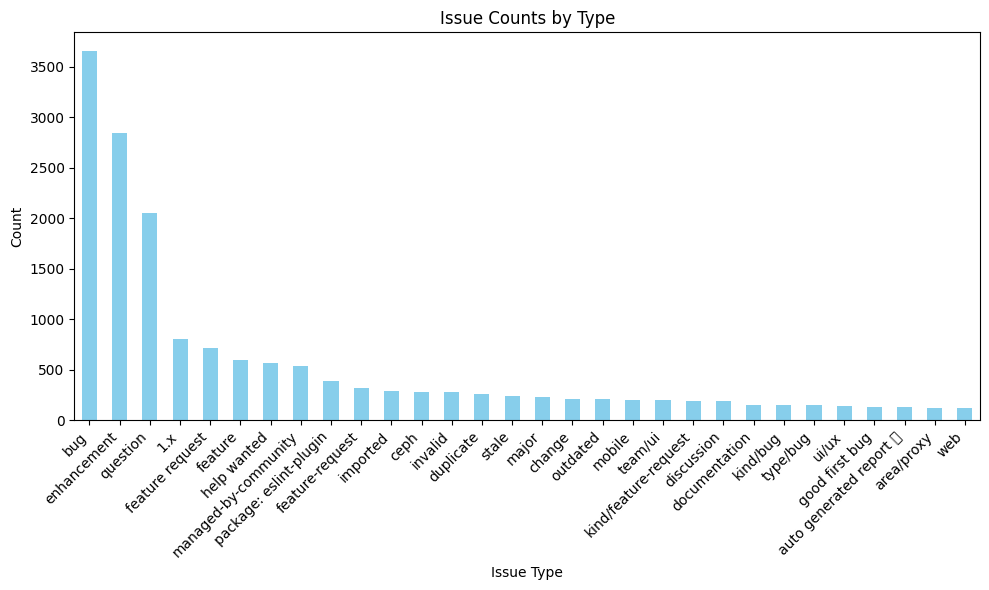

In [ ]:
# Create Plot
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
ilc_100[:30].plot(kind='bar', color='skyblue')  # Create a bar chart
plt.title('Issue Counts by Type')  # Title of the chart
plt.xlabel('Issue Type')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()  # Display the plot

In [ ]:
# ilc_df = ilc.to_frame(name="label_counts")
ilc_df = ilc.reset_index()
ilc_df.columns = ["Label", "Count"]
ilc_df.head(10)

,Label,Count
0,bug,3659
1,enhancement,2844
2,question,2057
3,1.x,805
4,feature request,717
5,feature,592
6,help wanted,568
7,managed-by-community,536
8,package: eslint-plugin,388
9,feature-request,319


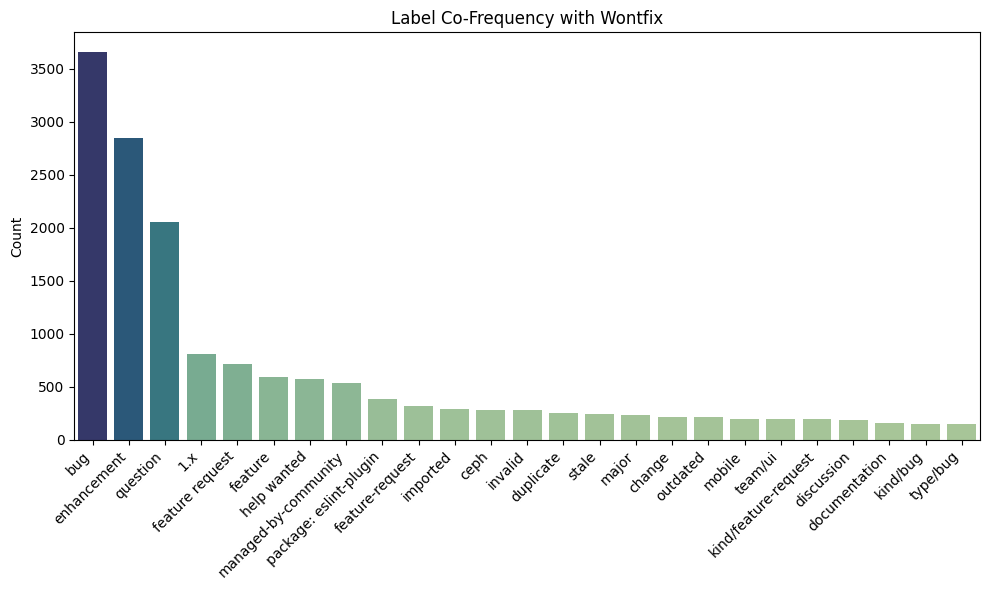

In [ ]:
plt.figure(figsize=(10, 6))
sns.color_palette("bright")
sns.barplot(x='Label', y='Count', data=ilc_df.nlargest(25, 'Count'), palette="crest", legend=False, hue='Count')
plt.title('Label Co-Frequency with Wontfix')
# plt.xlabel('Label')
plt.xlabel('') # This is because the x-axis looked funny in the paper with a caption beneath
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

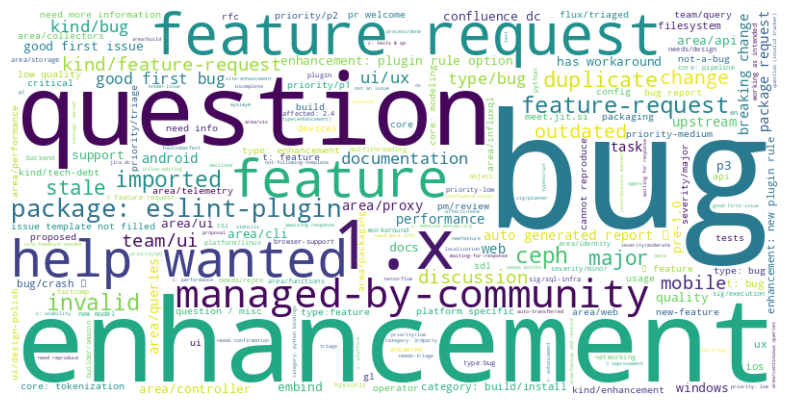

In [ ]:
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white')

# Generate a word cloud image
wordcloud.generate_from_frequencies(ilc)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## RQ3: What common reasons are there for an issue getting labeled as wontfix?

This is our qualitative study, where we analyized 400 issues and read the comments to understand why they got labeled as wontfix.

In [ ]:
qualitative.sample(3)

,title,number,repoId,repoName,labels,state,comments,createdAt,updatedAt,closedAt,...,classifiedBy,url,reason,code,Comments,Toxic?,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
id,,,,,,,,,,,,,,,,,,,,,
192712043,TODO: Display where parameters with non-string...,1942,3997010,spotify/luigi,"['FeatureRequest', 'wontfix']",closed,2,2016-11-30T23:34:37Z,2018-08-14T05:20:17Z,2018-08-14T05:20:17Z,...,alex,https://github.com/spotify/luigi/issues/1942,No replies or discussion,No Discussion,NaN,NaN,NaN,NaN,NaN,NaN
643876514,"first time user's message are not received, or...",9781,88718,signalapp/signal-android,['wontfix'],closed,1,2020-06-23T14:12:59Z,2022-02-03T22:41:00Z,2022-02-03T22:41:00Z,...,alex,https://github.com/signalapp/signal-android/is...,No replies. No discussion,No Discussion,NaN,NaN,NaN,NaN,NaN,NaN
267347119,Render Avatar on each message,611,4073584,faridsafi/react-native-gifted-chat,['wontfix'],closed,4,2017-10-21T03:29:36Z,2019-04-24T13:00:08Z,2019-04-24T13:00:08Z,...,alex,https://github.com/faridsafi/react-native-gift...,Alternate fix already available,Workaround,NaN,NaN,NaN,NaN,NaN,NaN


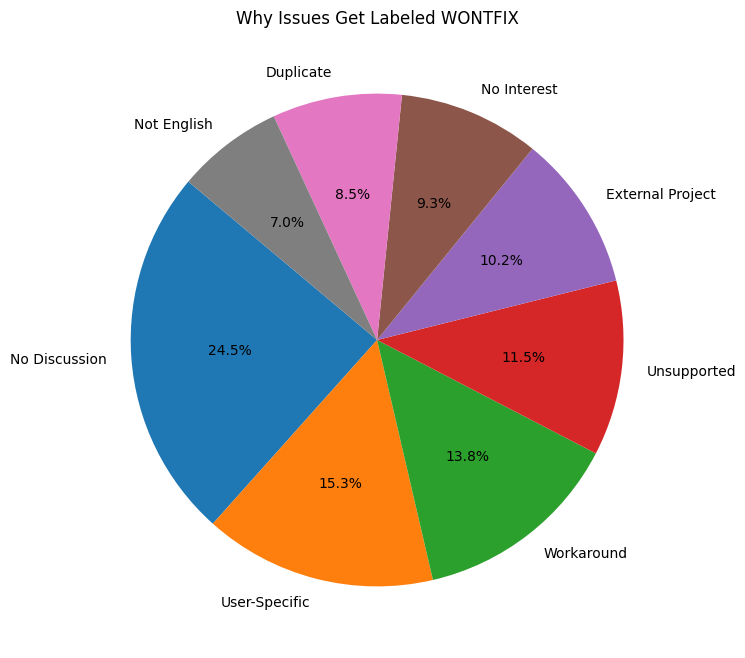

In [ ]:
# Prepare data
qualitative.loc[qualitative['code'] == 'Deprecated', 'code'] = "Duplicate"
qualitative.loc[qualitative['code'] == 'Prerequisite Required', 'code'] = "External Project"
label_counts = qualitative['code'].value_counts()
label_counts
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Why Issues Get Labeled WONTFIX')
plt.show()

In [ ]:
qualitative['comments'].sum()

1611